In [1]:
# POLYNOMIAL REGRESSION with Regularization

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Position_Salaries.csv')
print(data)

X = data['Level']
y = data['Salary']

X_array = np.array(X)   #.reshape(-1, 1)
y_array = np.array(y)

# transforming the data to include another axis
x = X_array[:, np.newaxis]
y = y_array[:, np.newaxis]

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


-1.3636284722222203 2
0.7380536056993869 3
0.626719353055935 4
0.9845986111116158 5
0.9854529448808441 6
0.9935763888848806 7
0.9933250417399226 8
0.9788164501100299 9
0.9906006903026391 10

best_score: 0.9935763888848806 
best_degree: 7


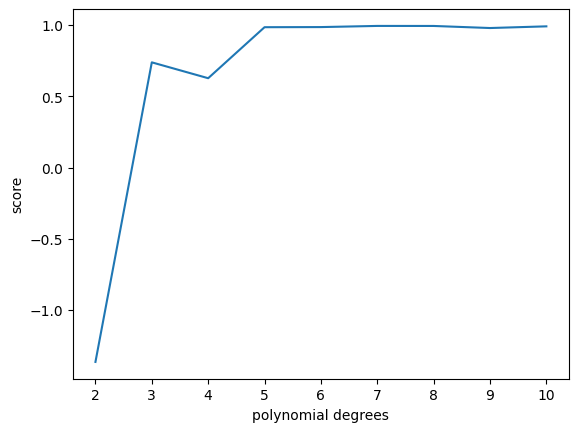

In [23]:
# degree search

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

degrees = np.arange(2, 11)                                         # degree 
best_score = 0
best_degree = 0
sc = []
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree = degree)
    x_poly = polynomial_features.fit_transform(x)
    polynomial_model = LinearRegression()
    polynomial_model.fit(x_poly, y)
    scores = cross_val_score(polynomial_model, x_poly, y, cv=5)   # k-fold cv value 
    if max(scores) > best_score:
        best_score = max(scores)
        best_degree = degree
    print(max(scores), degree)
    sc.append(max(scores))
print('\nbest_score:', best_score, '\nbest_degree:', best_degree)

plt.plot(degrees, sc)
plt.ylabel('score')
plt.xlabel('polynomial degrees')
plt.show()

In [ ]:
# 7 is the best, but 5 is the first on the plato.


Score: 0.9997969027099755
Coefficients: [[ 0.00000000e+00  1.60731002e+05 -1.00378788e+05  2.81649184e+04
  -3.44638695e+03  1.57692308e+02]]
Intercept: [-41333.33332987]


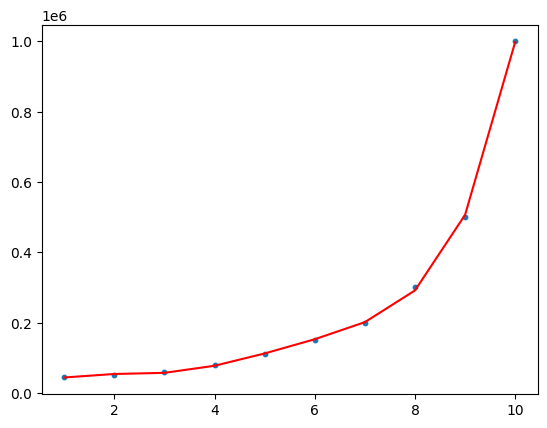

In [8]:
# Regression Model

import operator

# regression
polynomial_features= PolynomialFeatures(degree = 5)
x_poly = polynomial_features.fit_transform(x)

polynomial_model = LinearRegression()
polynomial_model.fit(x_poly, y)

y_poly_pred = polynomial_model.predict(x_poly)

mod_score = polynomial_model.score(x_poly, y)
print('Score:', mod_score)
print('Coefficients:', polynomial_model.coef_)
print('Intercept:', polynomial_model.intercept_)

# plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='red')
plt.show()


Score: 0.9922627649059657
Coefficients: [ 0.00000000e+00  6.75697914e+04 -7.13890290e+03 -6.34768679e+02
  3.68264428e+01  1.32187140e+01]
Intercept: [-40463.24540913]


C:\Users\MyWork\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.121e+09, tolerance: 8.066e+07
  model = cd_fast.enet_coordinate_descent(


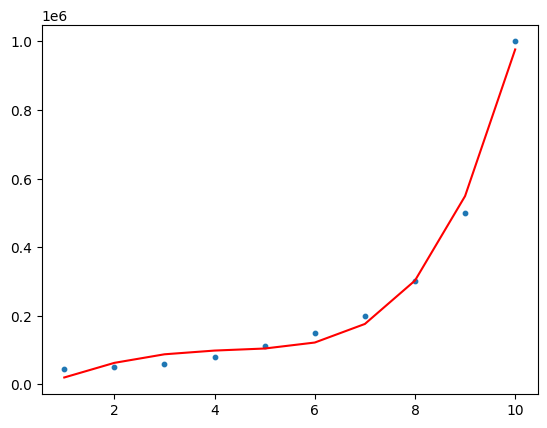

In [9]:
# Lasso Regularization

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Lasso

polynomial_features= PolynomialFeatures(degree = 5)
x_poly = polynomial_features.fit_transform(x)

lassoreg = Lasso(alpha=0.01)
lassoreg.fit(x_poly, y)

y_poly_pred_lasso = lassoreg.predict(x_poly)

print('Score:', lassoreg.score(x_poly, y))
print('Coefficients:', lassoreg.coef_)
print('Intercept:', lassoreg.intercept_)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred_lasso), key=sort_axis)
x, y_poly_pred_lasso = zip(*sorted_zip)

plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred_lasso, color='red')
plt.show()

In [ ]:
# it seems not to be optimized with Lasso